In [5]:
## Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
import matplotlib
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as web
import datetime
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3') # Обработчик сообщений, чтобы они не выводились при сборе данных о тикерах
urllib3_logger.setLevel(logging.CRITICAL)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import monthly_returns_heatmap as mrh
from tabulate import tabulate
import cvxpy as cp
import math
import seaborn as sns
import statsmodels.api as sm
# Need to import the matplotlib_converters from pandas,
# whenever you try to plot the columns of a dataframe using a for loop

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [175]:
list_of_tickers = ["BABA", "GOOGL", "FB", "INGR", "INTC", "JNJ", "LYB", "MSFT", "UNM", "VTRS", "AGRO.ME", "SBRCY", "IXC", "AAXJ", "EWZ", "ECH", "PICK", "EWS", "EZA", "EWU", "SCHH", "HYEM", "VGK", "VNQI"]
index = ['SPY']
start = datetime.datetime(2015,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
index_df = pdr.DataReader(index, 'yahoo', start, end)

In [176]:
data_pc = f.pct_change()
data_pc = pd.DataFrame(data_pc["Close"])
index_pc = index_df.pct_change()
index_pc = pd.DataFrame(index_pc["Close"])
data_pc.head(5)

Symbols,BABA,GOOGL,FB,INGR,INTC,JNJ,LYB,MSFT,UNM,VTRS,...,EWZ,ECH,PICK,EWS,EZA,EWU,SCHH,HYEM,VGK,VNQI
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.003271,-0.002092,0.005511,-0.000943,0.001929,-0.000478,0.008565,0.006674,-0.004014,-0.000355,...,-0.033087,-0.012033,-0.008312,-0.008410,-0.020210,-0.009429,0.024390,0.000000,-0.005152,0.004671
2015-01-05,-0.025097,-0.019054,-0.016061,-0.020765,-0.011276,-0.006984,-0.050331,-0.009196,-0.031664,-0.011180,...,-0.034219,-0.018016,-0.027724,-0.021588,-0.028657,-0.025196,-0.003258,-0.007401,-0.029152,-0.007439
2015-01-06,0.022970,-0.024679,-0.013473,-0.016024,-0.018637,-0.004914,-0.021173,-0.014677,-0.021403,-0.027638,...,0.017862,-0.002842,-0.004642,-0.011820,0.023343,-0.011488,0.010058,-0.001754,-0.011260,-0.004497
2015-01-07,-0.011518,-0.002941,0.000000,0.018856,0.020975,0.022076,0.010480,0.012705,0.009417,0.035622,...,0.027043,0.004924,0.002665,0.011164,0.029938,0.008716,0.015434,0.000879,0.010390,0.015434


In [177]:
data_pc['SPY'] = index_pc['SPY']

data_pc = data_pc.dropna()
index_pc = index_pc.dropna()

In [178]:
# Calculate the covariance of Amazon and S&P500.
Covariance = []

for i in data_pc:
    Covariance.append(np.cov(data_pc[i],
                    data_pc['SPY'])[0][1])


# Calculate the variance of S&P500
Variance = np.var(data_pc['SPY'])

# Print the beta of Amazon
#print('Beta = %.2f' % (Covariance / Variance))

g = [i / Variance for i in Covariance]

In [179]:
g

[0.8729909463311433,
 1.1003128306652334,
 1.1032021247797064,
 0.8072115843337198,
 1.2419092363525952,
 0.66241539926722,
 1.3774719739286942,
 1.2109726397063758,
 1.6063270859917052,
 0.9227445057004536,
 0.12705572818020577,
 1.0638384137654182,
 1.1419954566144943,
 0.8357895984230073,
 1.3323096878065892,
 0.8228437963058993,
 1.1256961046534304,
 0.72379995658524,
 1.1888638953636699,
 0.874021437234535,
 0.9050170210395821,
 0.2598353319491824,
 0.8715149755131805,
 0.6495574995175907,
 1.0008496176720478]

In [180]:
# Import Data
data1 = yf.download('SPY','2015-01-15','2021-06-14')
data2 = yf.download('GOOGL','2015-01-15','2021-06-14')

# Join the closing prices
monthly_prices = pd.concat([data1['Adj Close'], data2['Adj Close']], axis=1)
monthly_prices.columns = ['SPY','GOOGL']

# Check the monthly prices
print (monthly_prices.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   SPY       GOOGL
Date                              
2015-01-14  178.097900  505.929993
2015-01-15  176.466446  504.010010
2015-01-16  178.780640  510.459991
2015-01-20  179.161957  509.940002
2015-01-21  180.066345  520.390015


In [181]:
# Create a function for linear regression
def linreg(x,y):
    model = sm.OLS(y,x).fit()
    return model.params[0]

linreg(monthly_prices.GOOGL, monthly_prices.SPY)

0.22240223614622048

In [182]:
# Create a regression model
reg = sm.OLS(monthly_prices.GOOGL,
             monthly_prices.SPY)

# Fit the model
results = reg.fit()

# Print the beta of Amazon
print('Beta of Amazon: %.2f' % results.params[0])

Beta of Amazon: 4.43


In [183]:
#load libraries
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
# symbols = [stock, market]
# start date for historical prices
symbols = ['GOOGL', 'SPY']
data = yf.download(symbols, '2015-01-15','2021-06-14')['Adj Close']
# Convert historical stock prices to daily percent change
price_change = data.pct_change()
# Deletes row one containing the NaN
df = price_change.drop(price_change.index[0])
# Create arrays for x and y variables in the regression model
# Set up the model and define the type of regression
x = np.array(df['GOOGL']).reshape((-1,1))
y = np.array(df['SPY'])
model = LinearRegression().fit(x, y)
print('Beta = ', model.coef_)

[*********************100%***********************]  2 of 2 completed
Beta =  [0.49019974]


In [184]:
Covariance = np.cov(df['GOOGL'], df['SPY'])[0][1]


# Calculate the variance of S&P500
Variance = np.var(df['SPY'])

# Print the beta of Amazon
#print('Beta = %.2f' % (Covariance / Variance))

g = Covariance/ Variance
g

1.088735694033578

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas_datareader import data as dr
tickers = ['LKOH.ME', 'BZ=F']
data = pd.DataFrame(columns = tickers)
for t in tickers :
    data[t] = dr.DataReader(t, data_source = 'yahoo', start = '2020-1-15', end = '2021-6-14')['Adj Close']
returns = data.pct_change()
returns.dropna(inplace = True)
regress_coefs = stats.linregress(data['LKOH.ME'], data['BZ=F'])
print(regress_coefs)
beta = regress_coefs[0]
print('LKOH.ME BETA : {}'.format(beta))

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
LKOH.ME BETA : nan


### Расчет компаний по CAPM

In [295]:
list_of_tickers = ['IDT', 'AB', 'ALK', 'AMG', 'BKE', 'GME', 'EMR', 'GGG', 'CBB', 'FHI', 'CNC', 'AGX', 'HP', 'AGO', 'GBX', 'HLF', 'DD', 'ETW', 'GD', 'HRB', 'BRO', 'BTI', 'GPS', 'BEN', 'DGX', 'FSS', 'IPG', 'BLK', 'IBM', 'CHE', 'ANTM', 'CNS', 'CBRE', 'CBT', 'GSK', 'CR', 'HON', 'DIS', 'AHT', 'ACN', 'APH', 'HOG', 'EME', 'HFC', 'AMN', 'FIX', 'GWW', 'BNS', 'HPQ', 'BWA']
index = ['SPY']
start = datetime.datetime(2015,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
index_df = pdr.DataReader(index, 'yahoo', start, end)

In [296]:
data_pc = f.pct_change()
data_pc = pd.DataFrame(data_pc["Adj Close"])
index_pc = index_df.pct_change()
index_pc = pd.DataFrame(index_pc["Adj Close"])
data_pc.head(5)

Symbols,IDT,AB,ALK,AMG,BKE,GME,EMR,GGG,CBB,FHI,...,APH,HOG,EME,HFC,AMN,FIX,GWW,BNS,HPQ,BWA
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.027080,0.010453,0.009538,-0.008528,0.003998,0.000000,0.000972,0.002120,0.015674,0.000911,...,-0.003159,-0.001821,-0.014385,0.025614,-0.018878,-0.014019,0.001294,-0.011183,0.002741,-0.003822
2015-01-05,0.015182,-0.034099,-0.014255,-0.036259,-0.000379,0.027219,-0.020554,-0.015681,-0.043210,-0.020934,...,-0.018270,-0.019608,-0.030331,-0.043184,-0.015601,-0.016587,-0.024449,-0.021653,-0.016650,-0.028864
2015-01-06,-0.010967,-0.023007,-0.011771,-0.021548,-0.010435,-0.029666,-0.001652,-0.012644,-0.029032,-0.023551,...,-0.012723,-0.011938,-0.010818,-0.011691,-0.026413,-0.018073,-0.014178,-0.018292,-0.007581,-0.006960
2015-01-07,0.029738,0.010556,0.015314,0.024543,0.012078,-0.011576,-0.002152,0.012165,0.029900,0.024119,...,0.017119,0.016476,-0.000476,-0.021183,0.012480,0.008589,0.000896,0.002422,0.011714,0.023489


In [297]:
data_pc['SPY'] = index_pc['SPY']

data_pc = data_pc.dropna()
index_pc = index_pc.dropna()

In [298]:
# Calculate the covariance of Amazon and S&P500.
Covariance = []

for i in data_pc:
    Covariance.append(np.cov(data_pc[i],
                    data_pc['SPY'])[0][1])


# Calculate the variance of S&P500
Variance = np.var(data_pc['SPY'])

# Print the beta of Amazon
#print('Beta = %.2f' % (Covariance / Variance))

g = [i / Variance for i in Covariance]
g.pop()

1.0006161429451643

In [299]:
backtest_company = pd.DataFrame()
backtest_company['Tickers'] = list_of_tickers
backtest_company['Beta'] = g

In [300]:
backtest_company.head()

,Tickers,Beta
0,IDT,1.151527
1,AB,1.214268
2,ALK,1.294397
3,AMG,1.397572
4,BKE,0.979460


In [301]:
two_y_tresures = 0.0016
average_index_grow = 0.1094
backtest_company['expected_return'] = two_y_tresures + backtest_company['Beta'] * (average_index_grow - two_y_tresures)

In [302]:
backtest_company = backtest_company.sort_values(by='expected_return', ascending=False).reset_index(drop=True)

In [303]:
backtest_company_25 = backtest_company.iloc[:25]
backtest_company_25.head()

,Tickers,Beta,expected_return
0,HP,1.580349,0.171962
1,AHT,1.486506,0.161845
2,AMG,1.397572,0.152258
3,GBX,1.360665,0.148280
4,HOG,1.336646,0.145690


In [15]:
list_of_tickers = ["IXC", "AAXJ", "EWS", "SCHH", "VNQI", "HYEM", "VGK"]
#backtest_company_25['Tickers']
index = ['SPY']
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2019,12,31)
#end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
index_df = pdr.DataReader(index, 'yahoo', start, end)

In [16]:
stock_prices = pd.DataFrame(f["Adj Close"])
stock_prices.dropna(inplace=True)
stock_prices

Symbols,IXC,AAXJ,EWS,SCHH,VNQI,HYEM,VGK
Date,,,,,,,
2018-12-31,25.718306,61.415768,20.251593,36.258060,48.142628,19.405416,44.788906
2019-01-02,26.200247,60.990410,20.251593,35.297714,47.802757,19.362064,44.540176
2019-01-03,26.068810,59.549995,19.875885,35.504845,47.876247,19.370737,44.208542
2019-01-04,26.936308,61.512444,20.517336,35.909698,48.923420,19.474792,45.535076
2019-01-07,27.190426,61.879795,20.792246,36.267483,49.208179,19.587507,45.737747
...,...,...,...,...,...,...,...
2019-12-24,28.978415,71.749290,23.012564,43.788292,57.677845,21.806936,55.432789
2019-12-26,29.044210,72.192734,23.108650,44.020901,57.994865,21.898762,55.709526
2019-12-27,28.978415,72.626320,23.079823,44.166283,58.410950,22.018129,55.967178


In [17]:
# Calculate annualised returns
annual_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) / stock_prices.iloc[0]) \
                   + 1)**(252/len(stock_prices)) - 1)

In [18]:
# Create an empty dataframe
portfolio = pd.DataFrame()
weights_array = []

# Initialize the number of portfolios
num_of_portfolios = 10000

# Get the number of stocks available in the data file
num_of_stocks = stock_prices.shape[1]

# Calculate daily returns
stock_returns = stock_prices.pct_change().dropna()

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate random portfolio
    rnd_nums = list(np.random.random(num_of_stocks))
    
    # Ensure the sum of weights is 1
    weights = list(rnd_nums/sum(rnd_nums))
    
    # Save weight allocation in a list
    weights_array.append(weights)
    
    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = sum(weights * annual_returns)
    
    # Calculate the portfolio returns
    portfolio_rets = stock_returns * weights
    
    # Caclulate the portfolio standard deviation
    portfolio.loc[i, 'std_dev'] = portfolio_rets.sum(axis=1).std()*math.sqrt(252)

    # Caclulate the portfolio Sharpe 
    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

In [19]:
portfolio.loc[10, 'returns'] = sum(weights * annual_returns)
annual_returns

Symbols
IXC     0.126231
AAXJ    0.178558
EWS     0.144734
SCHH    0.227535
VNQI    0.215025
HYEM    0.128011
VGK     0.247417
dtype: float64

In [20]:
# Identify the portfolio with the maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]
wts_max_ret_by_std_dev = weights_array[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with the minimum standard deviation using idxmin() function
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
wts_min_std_dev = weights_array[portfolio['std_dev'].idxmin()]

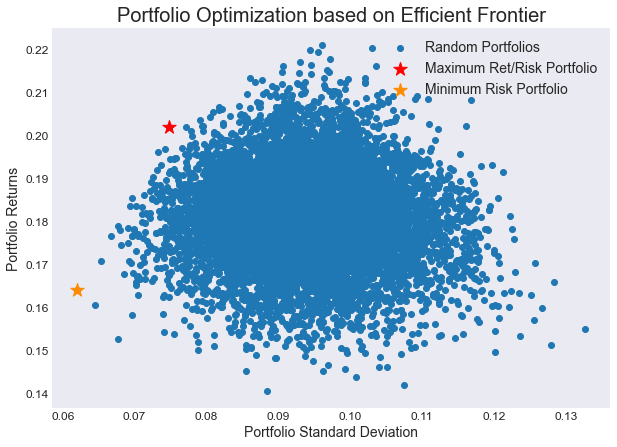

In [21]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

In [22]:
# Print the portfolio with the maximum Sharpe ratio
print("The portfolio metrics for the maximum return/std dev. portfolio:")
print(max_ret_by_std_dev)
print("\nThe portfolio weights for each stock in the maximum return/std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_max_ret_by_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.201982
std_dev            0.074825
returns/std_dev    2.699406
Name: 4546, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
IXC 0.84%
AAXJ 1.01%
EWS 1.86%
SCHH 23.88%
VNQI 9.69%
HYEM 28.41%
VGK 34.31%


In [23]:
# Print the portfolio with the minimum risk
print("The portfolio metrics for the minimum std dev. portfolio:")
print(min_std_dev)
print("\nThe portfolio weights for each stock in the minimum std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_min_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the minimum std dev. portfolio:
returns            0.164254
std_dev            0.062037
returns/std_dev    2.647691
Name: 2618, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
IXC 13.52%
AAXJ 2.91%
EWS 0.25%
SCHH 21.85%
VNQI 4.86%
HYEM 49.07%
VGK 7.53%
